In [ ]:
#K-Means Coustering
#Elbow Method
#Principal component analysis
#Dimansionality Reduction
#Cluster Visualization


#K-Means Coustering
''' 
5 step couster
   1. tell the machine - how many group, k=? if 3
   2. drop 3 random points (as group leader / starting point)
   3. others choose ther group
   4. move group leader in center
   5. repeat
'''

#Elbow Method
'''  
find elbow point \_
'''



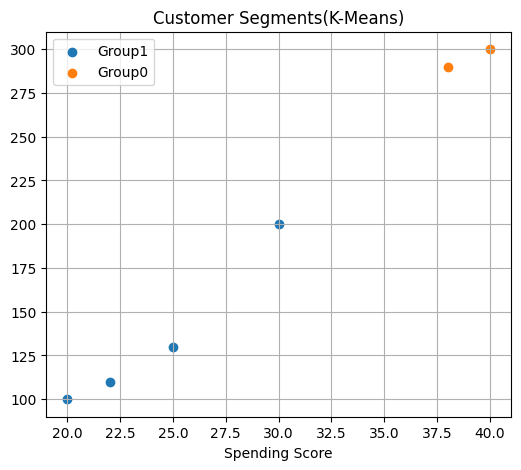

  Customer  Age  Spending  Group
0     Riya   20       100      1
1     Aman   30       200      1
2   Faizan   40       300      0
3     Neha   22       110      1
4    Imran   38       290      0
5    Sneha   25       130      1


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#sample data 
data ={
    'Customer':['Riya', 'Aman',' Faizan', 'Neha', 'Imran', 'Sneha'],
    'Age':[20, 30, 40, 22, 38, 25],
    'Spending':[100, 200, 300, 110, 290, 130]
}
df = pd.DataFrame(data)
X= df[['Age','Spending']]

model = KMeans(n_clusters=2 , random_state=42 , n_init=10) 
'''
n_cluster = 2 #number of cluster = how many part to devide
random_state = 42(use any number , but 42 is defult) ; suffel kore every time it start with a new point
n_init =10 (defult 10 time clusting(suffel) for big data n=20/50 )

overall - devide 2 part , and random state suffel 10 time and pick the best one then stop suffel(clusting)

'''

df['Group'] = model.fit_predict(X)

plt.figure (figsize=(6,5))
for group in df['Group'].unique():       #unique = create every group unique if 2 group-[0,1]
    group_data = df[df['Group']== group]  #masking /....... group filter + detect which group
    plt.scatter(group_data['Age'], group_data['Spending'], label=f'Group{group}')

plt.xlabel('Age')
plt.xlabel('Spending Score')
plt.title('Customer Segments(K-Means)')
plt.legend()
plt.grid(True)
plt.show()

print(df)


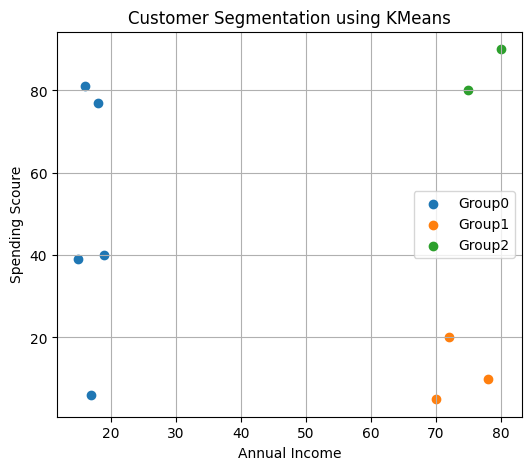

   CustomerID  AnnualIncome  SpendingScore  Group
0           1            15             39      0
1           2            16             81      0
2           3            17              6      0
3           4            18             77      0
4           5            19             40      0
5           6            70              5      1
6           7            72             20      1
7           8            75             80      2
8           9            78             10      1
9          10            80             90      2


In [5]:
#practice
#Customer Segmentation using KMeans

import pandas as pd
from  sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

data = {
    'CustomerID': [1,2,3,4,5,6,7,8,9,10],
    'AnnualIncome': [15,16,17,18,19,70,72,75,78,80],
    'SpendingScore': [39,81,6,77,40,5,20,80,10,90]
}

df= pd.DataFrame(data)

X= df[['AnnualIncome','SpendingScore']]

model = KMeans(n_clusters=3 , random_state=42 ,n_init=10)

df['Group'] = model.fit_predict(X)

plt.figure(figsize=(6,5))

for group in df['Group'].unique():
    group_data = df[df['Group']== group]
    plt.scatter(group_data['AnnualIncome'] , group_data['SpendingScore'], label=f'Group{group}' )

plt.xlabel('Annual Income')
plt.ylabel('Spending Scoure')
plt.title('Customer Segmentation using KMeans')
plt.legend()
plt.grid(True)
plt.show()

print(df)